In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
data = pd.read_csv('Data/clickbait_data.csv')

In [6]:
preprocessed_data = data
preprocessed_data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [7]:
# tokenized_data = data
# for i in range(len(data)):
#     tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [9]:
data['headline']
preprocessed_data = [tokenizer.tokenize(list(data['headline'])[i]) for i in range(len(data))]
preprocessed_data
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

# tokenized_review = tokenizer.tokenize(review)

[['Should', 'I', 'Get', 'Bings'],
 ['Which', 'TV', 'Female', 'Friend', 'Group', 'Do', 'You', 'Belong', 'In'],
 ['The',
  'New',
  'Star',
  'Wars',
  'The',
  'Force',
  'Awakens',
  'Trailer',
  'Is',
  'Here',
  'To',
  'Give',
  'You',
  'Chills'],
 ['This',
  'Vine',
  'Of',
  'New',
  'York',
  'On',
  'Celebrity',
  'Big',
  'Brother',
  'Is',
  'Fucking',
  'Perfect'],
 ['A',
  'Couple',
  'Did',
  'A',
  'Stunning',
  'Photo',
  'Shoot',
  'With',
  'Their',
  'Baby',
  'After',
  'Learning',
  'She',
  'Had',
  'An',
  'Inoperable',
  'Brain',
  'Tumor'],
 ['How',
  'To',
  'Flirt',
  'With',
  'Queer',
  'Girls',
  'Without',
  'Making',
  'A',
  'Total',
  'Fool',
  'Of',
  'Yourself'],
 ['32',
  'Cute',
  'Things',
  'To',
  'Distract',
  'From',
  'Your',
  'Awkward',
  'Thanksgiving'],
 ['If', 'Disney', 'Princesses', 'Were', 'From', 'Florida'],
 ['What',
  's',
  'A',
  'Quote',
  'Or',
  'Lyric',
  'That',
  'Best',
  'Describes',
  'Your',
  'Depression'],
 ['Natalie',


In [10]:
tokenizer.tokenize(data['headline'][0])

['Should', 'I', 'Get', 'Bings']

In [12]:
def tokenize(text):
    text = [word_tokenize(x) for x in text]
    return text

df.text = tokenize(df.text)

stopwords_list = stopwords.words('english')
df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])

NameError: name 'df' is not defined

In [14]:
' '.join(X_train)

NameError: name 'X_train' is not defined

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taejoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/taejoon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/taejoon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['clickbait'], random_state=0)

tfidf = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2))

tfidf_text_train = tfidf.fit_transform(X_train)
tfidf_text_test = tfidf.transform(X_test)

In [21]:
tfidf_text_train

<24000x119045 sparse matrix of type '<class 'numpy.float64'>'
	with 274770 stored elements in Compressed Sparse Row format>

In [22]:
y_train

6848     1
17747    0
25807    0
30292    0
12804    1
        ..
13123    1
19648    0
9845     1
10799    1
2732     1
Name: clickbait, Length: 24000, dtype: int64

In [23]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score

In [24]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds)

In [25]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(tfidf_text_train, y_train)

nb_train_preds = nb_classifier.predict(tfidf_text_train)
nb_test_preds = nb_classifier.predict(tfidf_text_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.99925, ' Training Recall:', 0.998835371433325)
('Testing Accuracy:', 0.96425, ' Testing Recall:', 0.9708396178984414)


In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

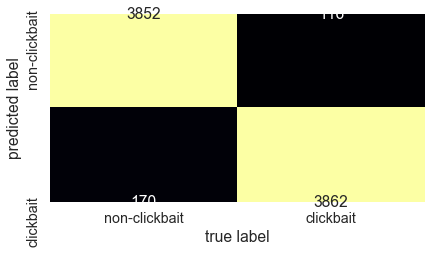

In [32]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig('nbcm5')
plt.show();

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced' )
rf_classifier.fit(tfidf_text_train, y_train)

rf_test_preds = rf_classifier.predict(tfidf_text_test)
rf_train_preds = rf_classifier.predict(tfidf_text_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [ ]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(tfidf_text_train, y_train)

svm_test_preds = svm_classifier.predict(tfidf_text_test)
svm_train_preds = svm_classifier.predict(tfidf_text_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(tfidf_text_train, y_train)

lr_train_preds = lr.predict(tfidf_text_train)
lr_test_preds = lr.predict(tfidf_text_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
tfidf_text_train

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

D_train = xgb.DMatrix(tfidf_text_train, label=y_train)
D_test = xgb.DMatrix(tfidf_text_test, label=y_test)

xgb_clf.train(D_train)
xgb_test_preds = xgb_clf.predict(D_test)
xgb_train_preds = xgb_clf.predict(D_train)

#print(train_results(lr_train_preds))
print(test_results(xgb_test_preds))
print(train_results(xgb_train_preds))
#confusion matrix on test set xgboost Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, xgb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');